<a href="https://colab.research.google.com/github/OSegun/Deep-Learning-Projects/blob/main/custom_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the data
# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop(columns=["output"], axis=1).values
y = df.output.values
print(f"X: {X.shape}\nY: {y.shape}")

X: (303, 13)
Y: (303,)


In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [ ]:
class NeuralArchitechure:

    def __init__(self, lr, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1]) # weight
        self.b = np.random.randn() # bias
        self.lr = lr # learning rate
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.train_loss = []
        self.test_loss = []

    def activation(self, x): # sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def activation_deravative(self, x):
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden = np.dot(X, self.w) + self.b
        activate = self.activation(hidden)
        return activate

    def backward(self, X, y_true): # Calculate gradients
        hidden = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dl_pred = 2 * (y_pred - y_true)
        dl_hidden = self.activation_deravative(hidden)
        dhidden_db = 1
        dhidden_dw = X

        dl_db = dl_hidden * dhidden_db
        dl_dw = dl_pred * dhidden_dw
        return dl_db, dl_dw

    def optimizer(self, dl_db, dl_dw): # update weights
        self.b = self.b - dl_db * self.lr
        self.w = self.w - dl_dw * self.lr

    def train(self, Iterations):
        for i in range(Iterations):
            pos = np.random.randint(len(self.X_train))

            # forward
            y_train_true = self.y_train[pos]
            y_train_pred = self.forward(self.X_train[pos])

            # claculate loss
            loss = np.sum(np.square(y_train_pred - y_train_true))
            self.train_loss.append(loss)

            # calculate gradients
            dl_db, dl_dw = self.backward(
                self.X_train[pos], self.y_train[pos]
            )

            # update weights
            self.optimizer(dl_db, dl_dw)

            # Calculting error at every epoch
            loss_sum = 0
            for i in range(len(self.X_test)):
                y_true = self.y_test[i]
                y_pred = self.forward(self.X_test[i])
                loss_sum += np.square(y_pred - y_true)
            self.test_loss.append(loss_sum)

        return "Training Successful"




In [ ]:
lr = 0.01
iterations = 1000

In [ ]:
nn = NeuralArchitechure(
    lr=lr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

nn.train(Iterations=iterations)

'Training Successful'

<AxesSubplot:>

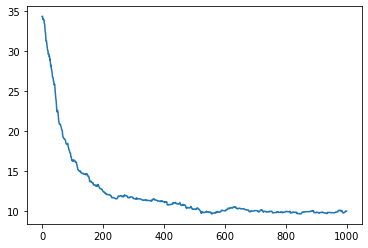

In [ ]:
sns.lineplot(x=list(range(len(nn.test_loss))), y=nn.test_loss)

In [ ]:
y_preds = []
num_correct = 0
for i in range(X_test.shape[0]):
    y_true = y_test[i]
    y_pred = np.round(nn.forward(X_test[i]))
    y_preds.append(y_pred)
    if y_true == y_pred: num_correct += 1
    else: 0

In [ ]:
accuracy = num_correct/X_test.shape[0]
accuracy

0.7704918032786885

In [ ]:
confusion_matrix(y_test, y_preds)

array([[27,  3],
       [11, 20]], dtype=int64)